# Exploratory Data Analysis

In this notebook, we are going to anaylze the data. With the help of this analysis I will have a better understanding of my listening taste.

In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import calplot
sns.set()

# 1. My Streaming History

In this section, I am going to analyse my behaviour and personality with the help of my music listening history. Here I am using my spotify listening history. I first started using spotify in 2019 and still continue to listen songs on it. Hence in the past 2 year I have generated a huge amount of data which will be enough for analysis. 

In [2]:
# reading the dataset in dataframe
my_streaming = pd.read_csv('data\dataset.csv')
my_streaming = my_streaming.drop(columns=['Unnamed: 0'])
my_streaming.head(3)

artistName                        trackName  msPlayed  \
0      Dua Lipa                            IDGAF    213981   
1  Selena Gomez                      Back To You    189227   
2    Ed Sheeran  Beautiful People (feat. Khalid)    176352   

              datetime  danceability  energy  key  loudness  mode  \
0  2020-05-28 09:21:00         0.836   0.544  7.0    -5.975   1.0   
1  2020-05-29 13:23:00         0.601   0.724  6.0    -4.856   1.0   
2  2020-05-29 13:42:00         0.640   0.648  5.0    -8.113   0.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0943        0.0403          0.000000    0.0824    0.510   97.028   
1       0.0486        0.0945          0.000002    0.1200    0.508  102.061   
2       0.1870        0.1240          0.000000    0.0802    0.548   92.977   

                       id  time_signature  
0  76cy1WJvNGJTj78UqeA5zr             4.0  
1  4hQ6UGyWQIGJmHSo0J88JW             4.0  
2  4evmHXcjt3bTUHD1cvny97             4.0

## How often did I listened music?

In this visualization, I will determine that everday for how long I used to listen to music. This plot is similar to a plot on github which shows us the number of commits we make everyday, but, here I will be showing the amount time (in minutes) I listened to music.

In [3]:
# converting ms to minute and extracting date from datetime column
my_streaming['mins_played'] = my_streaming.apply(lambda x: round(x['msPlayed']/60000,2), axis=1)
my_streaming['date'] = my_streaming.apply(lambda x: pd.to_datetime(x['datetime'][:10],format='%Y-%m-%d'),axis=1)

# calculate the daily streaming time length 
daily_length = my_streaming.groupby('date',as_index=True).sum()

In [4]:
# create new date series for displaying time series data
idx = pd.DataFrame(pd.date_range(min(my_streaming.date), max(my_streaming.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

# use new date series to display the daily streaming time
new_daily_length = pd.merge(idx, daily_length, how='left', left_on='date', right_on = 'date', copy=False)
new_daily_length.head(3)

date  msPlayed  danceability  energy   key  loudness  mode  \
0 2020-05-28  213981.0         0.836   0.544   7.0    -5.975   1.0   
1 2020-05-29  954945.0         3.886   4.172  22.0   -36.959   4.0   
2 2020-05-30  954480.0         3.796   4.629  34.0   -30.542   3.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0943       0.04030          0.000000    0.0824    0.510   97.028   
1       0.4877       0.40286          0.692037    1.0076    3.738  784.233   
2       0.5257       0.45461          0.010801    1.7710    4.109  760.667   

   time_signature  mins_played  
0             4.0         3.57  
1            24.0        15.91  
2            24.0        15.90

In [5]:
# getting rid of columns except for date and time
new_daily_length = new_daily_length.drop(new_daily_length.loc[:, 'msPlayed':'time_signature'], axis=1)

# setting date as index
new_daily_length.index = new_daily_length.date

new_daily_length = new_daily_length.drop(columns=['date'])
new_daily_length.head(3)

mins_played
date                   
2020-05-28         3.57
2020-05-29        15.91
2020-05-30        15.90

In [6]:
# converting the dataframe into series for calplot
new_daily_length = new_daily_length.squeeze()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 1440x720 with 3 Axes>,
 array([<AxesSubplot:ylabel='2020'>, <AxesSubplot:ylabel='2021'>],
       dtype=object))

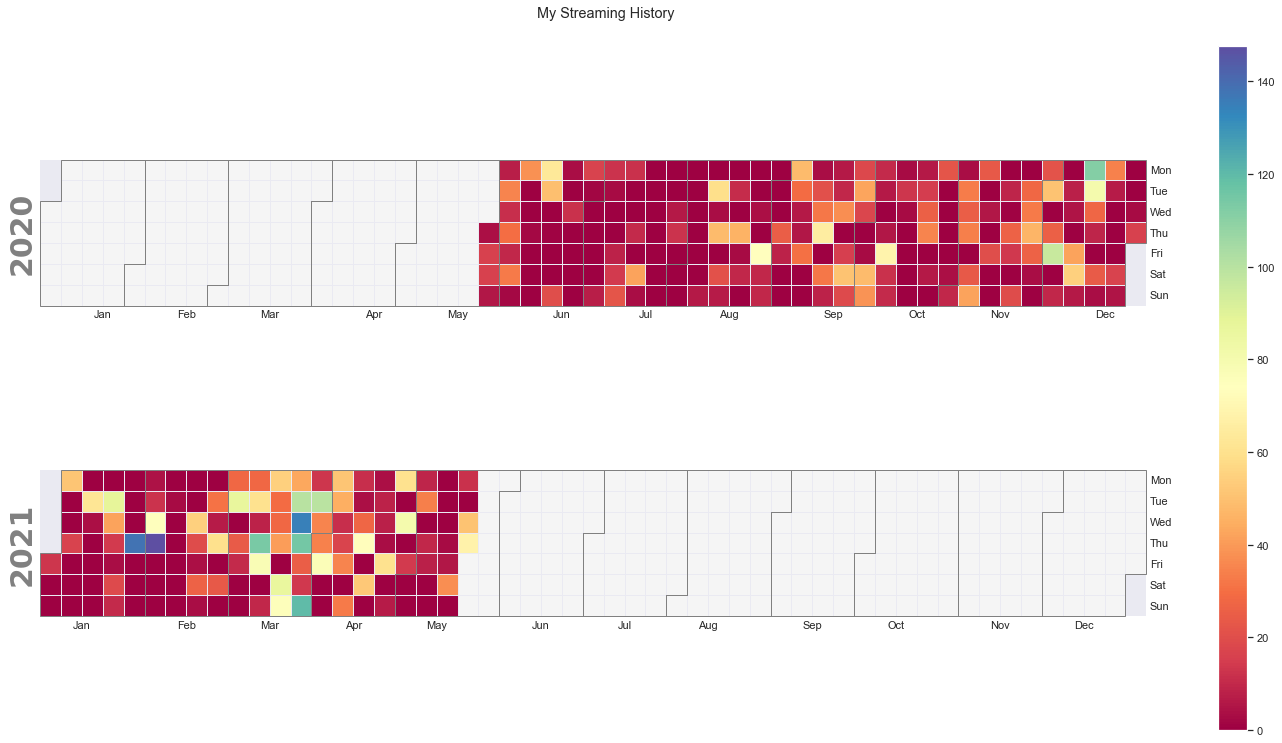

In [7]:
calplot.calplot(new_daily_length, figsize=(20,10), suptitle='My Streaming History', cmap='Spectral' )

I listen to music everyday when I used to travel to my college. As per the graph, everyday I used to listen to songs from 5-80 mins. However, there were days when I listened to music for more than 100 mins as well. Morover, many days I never listened to music as well, this is probably because I might be late for my college and I never had the time to plug in. Then since April 2020 lockdown was imposed, and at home I listened for less amount of time (approx less than 30 minutes). However, there were a few days when I would listen for more than an hour.

## Whom did I listened to most?

Here I will be plotting a graph to determine my most heard artist in this past year. 

In [8]:
# grouping the dataset as per artist name and counting the songs per artist
artist_length = my_streaming.groupby('artistName',as_index=False).sum()
artist_song_cnt = my_streaming.groupby('artistName',as_index=False).agg({"trackName": "nunique"})

In [9]:
# merge artist_length and artist_song_cnt 
artist_length_uniqsong = pd.merge(artist_length,artist_song_cnt,how='left',on='artistName',copy=False)
artist_length_uniqsong.rename(columns={'trackName':'unique_track_number'},inplace=True)
artist_length_uniqsong.head(3)

artistName  msPlayed  danceability  energy   key  loudness  mode  \
0      $teev     61156         0.378   0.709   1.0    -7.558   1.0   
1   2 Chainz    227893         0.563   0.902   1.0    -4.586   0.0   
2       3LAU    861040         2.922   4.119  21.0   -23.537   5.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0882       0.01730          0.000002    0.3840   0.2280   80.500   
1       0.4020       0.05450          0.000000    0.0524   0.5590  171.999   
2       0.3210       0.10226          0.053489    1.0398   1.8225  545.900   

   time_signature  mins_played  unique_track_number  
0             4.0         1.02                    1  
1             4.0         3.80                    1  
2            19.0        14.36                    5

In [10]:
max_time  = artist_length_uniqsong.sort_values(by=['mins_played'])
max_time.tail()

artistName  msPlayed  danceability   energy    key  \
572                           Rak-Su   4533258        20.582  20.5000  135.0   
517                              OMI   5392526        20.092  21.4570  152.0   
706  Truth and Lies: Jeffrey Epstein   6333096         0.853   1.4820   16.0   
377                            Kesha   9330716        36.488  41.2824  355.0   
645                            Solve  18501441         6.810  10.2500   90.0   

     loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
572  -183.746  14.0       3.7964      5.956070          2.777886    6.2529   
517  -149.744  19.0       2.4500      5.985422          0.016492    5.1458   
706   -19.519   1.0       0.0874      0.048659          0.962190    0.4890   
377  -341.589  33.0       4.5756      9.157378          2.412288   11.6680   
645  -113.098   9.0       2.2458      3.095064          0.245869    4.3972   

     valence     tempo  time_signature  mins_played  unique_track_number  
572  17.7550  3425.414           120.0        75.57                   30  
517  17.6540  3505.586           117.0        89.87                   29  
706   0.9180   306.064             8.0       105.55                    2  
377  31.1983  7629.747           227.0       155.54                   59  
645   6.5964  1769.316            55.0       308.34                   15

In [11]:
# top 30 artist I listen to (tail because the df is in ascending order of count of minutes)
most_heard_30 = max_time.tail(30)

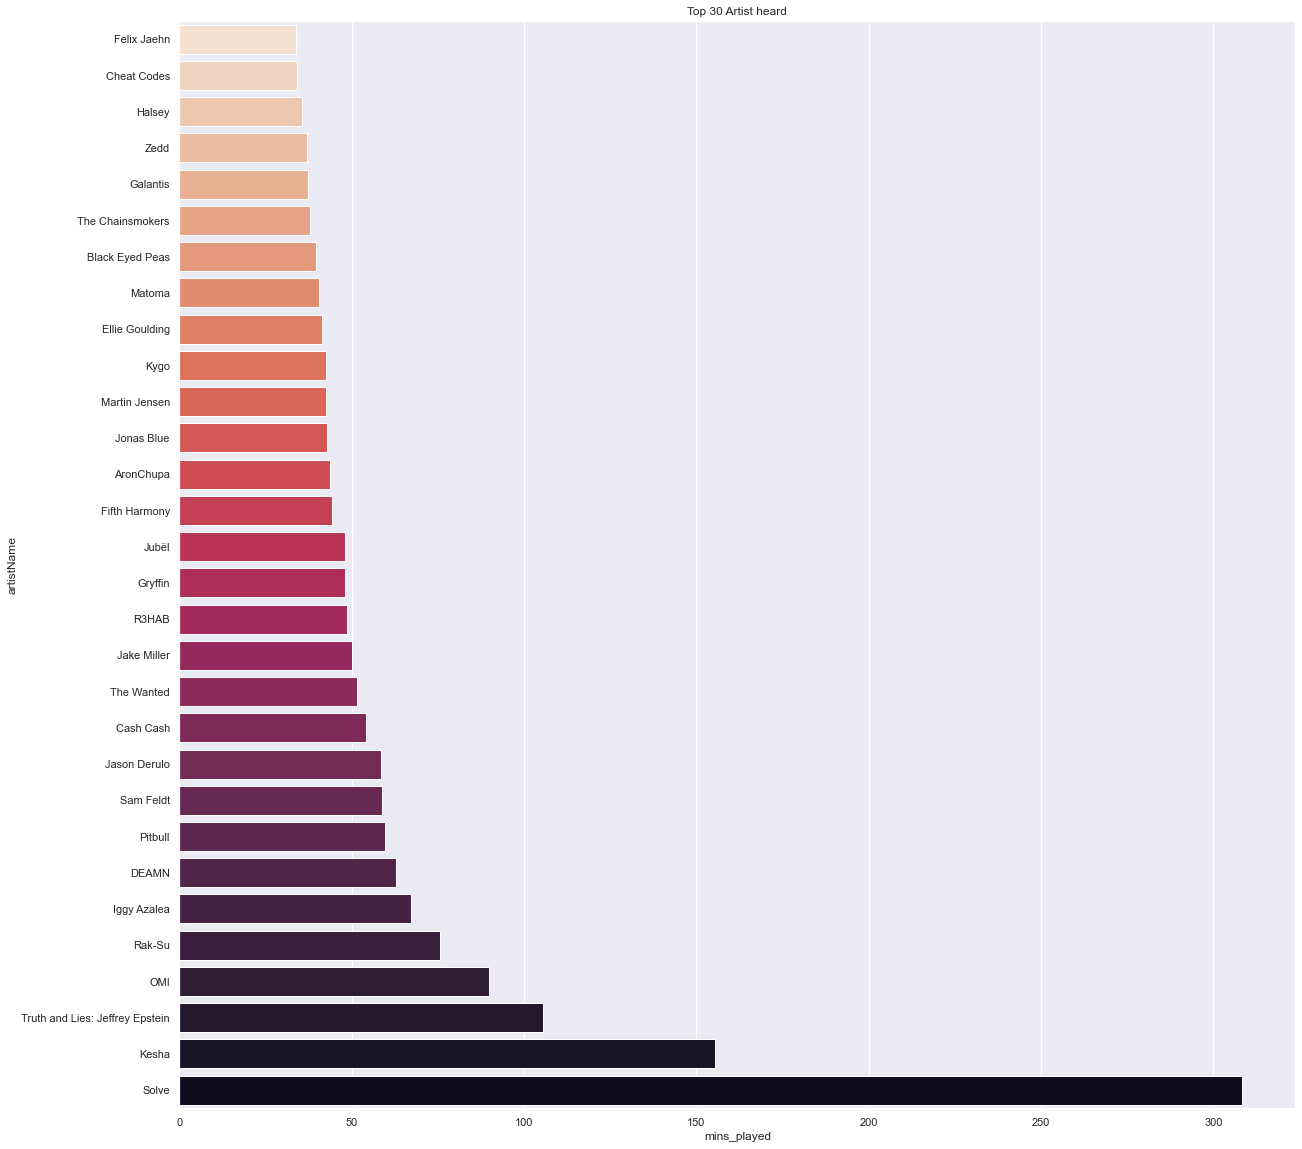

In [12]:
# barplot artist vs minutes_played
plt.rcParams["figure.figsize"] = (20,20)
sns.barplot(y = most_heard_30['artistName'], x = most_heard_30['mins_played'], palette='rocket_r')
plt.title('Top 30 Artist heard')
plt.show()

Since the bar graph could only show 30 artist clearly. In the next plot, I have made a word cloud, where I am representing my top 100 artists  with no compromise in clarity.

In [13]:
# converted df to dict
artist_freq = dict(zip(artist_length_uniqsong['artistName'].tolist(), artist_length_uniqsong['mins_played'].tolist()))

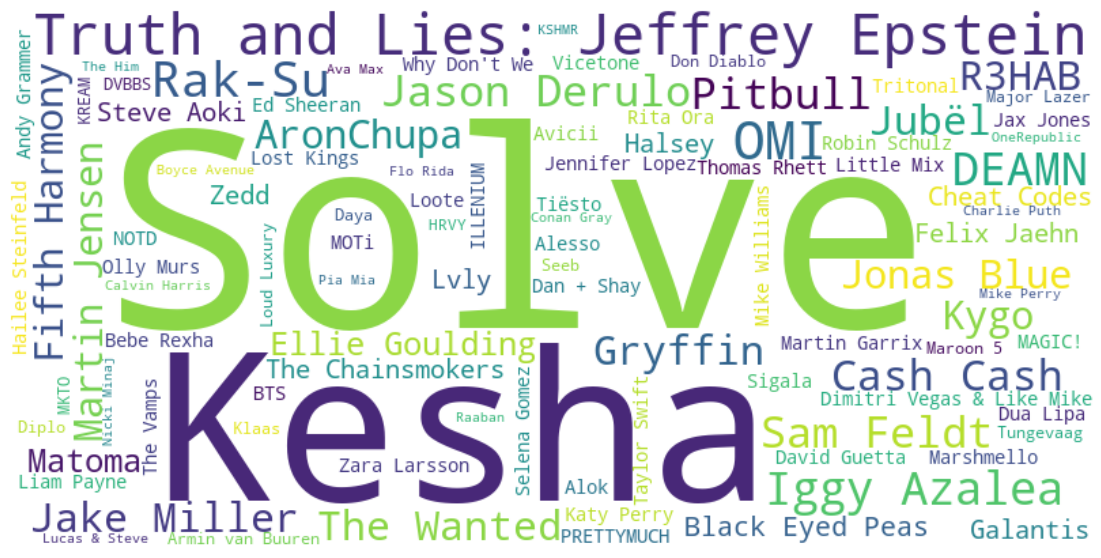

In [14]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white',width=800, height=400, max_words=100).generate_from_frequencies(artist_freq)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

As you can see in the  above graph, the bigger the artist the name, the most I listened to the artist. Moreover, this plot easily inculacate 100 artists.

Let's look at the list of artists for whom I have listened the minimum of 5 songs.

In [15]:
max_songs = artist_length_uniqsong.loc[artist_length_uniqsong['unique_track_number'] > 5]

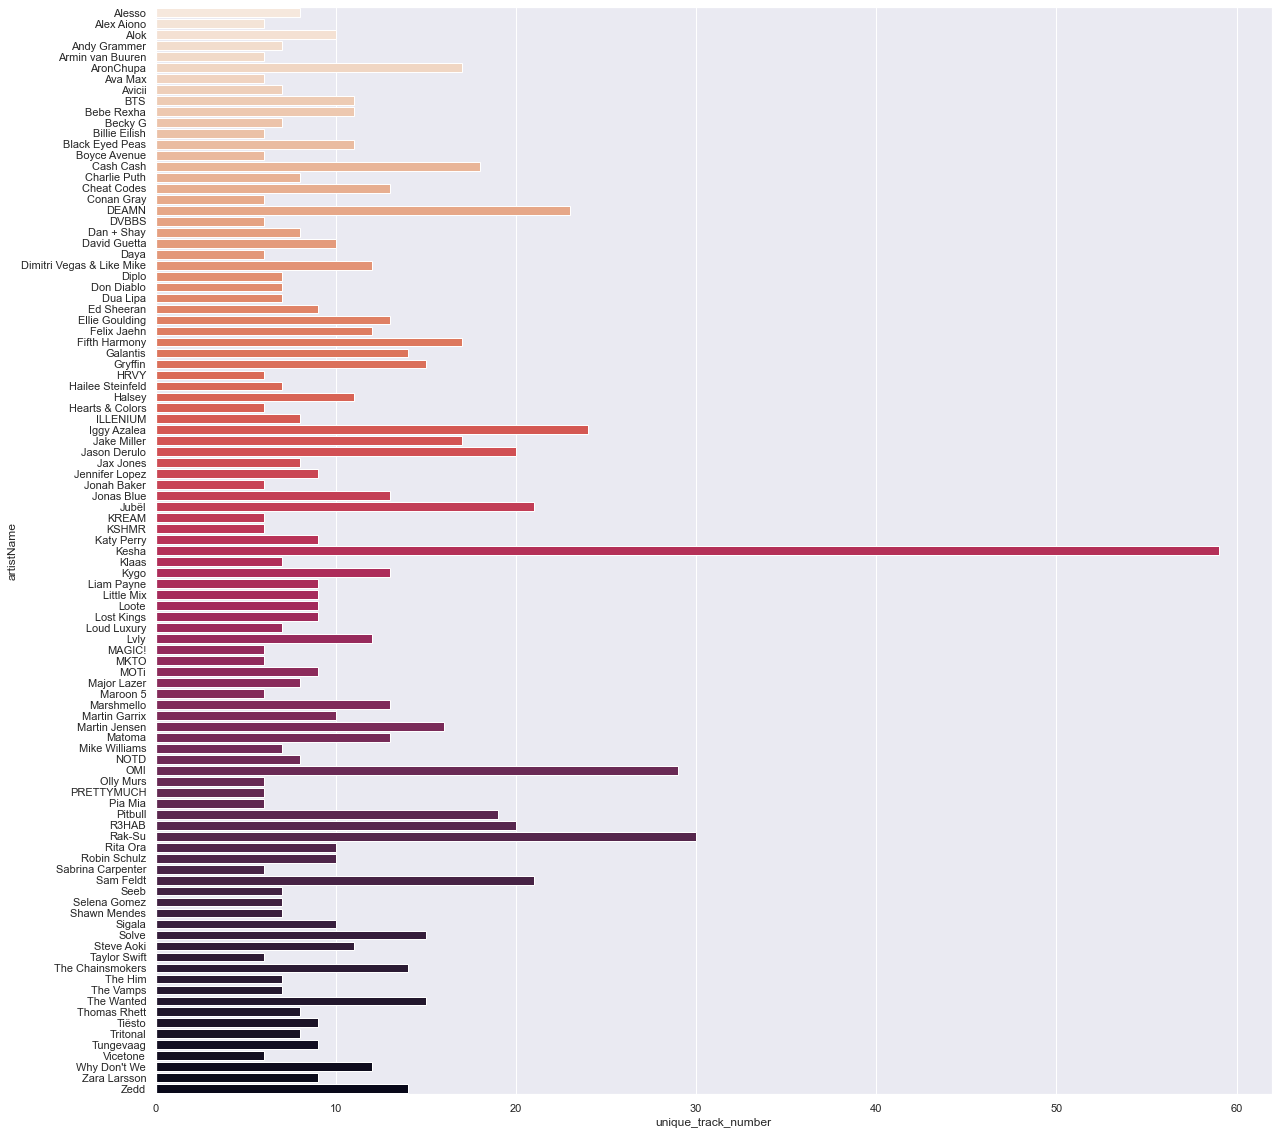

In [16]:
sns.barplot(y = max_songs['artistName'], x = max_songs['unique_track_number'], palette='rocket_r')
plt.rcParams["figure.figsize"] = (20,20)

## My mood throughout the year.

In [17]:
my_streaming.columns

Index(['artistName', 'trackName', 'msPlayed', 'datetime', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id',
       'time_signature', 'mins_played', 'date'],
      dtype='object')

In [18]:
# create new date series for displaying time series data
idx = pd.DataFrame(pd.date_range(min(my_streaming.date), max(my_streaming.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

In [19]:
valence = my_streaming.groupby('date')['valence'].aggregate(['min', np.mean, 'max'])

In [20]:
val = pd.merge(idx, valence, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)
val.head()

date     min      mean    max
0 2020-05-28  0.5100  0.510000  0.510
1 2020-05-29  0.1520  0.623000  0.959
2 2020-05-30  0.5050  0.684833  0.898
3 2020-05-31  0.1070  0.187000  0.267
4 2020-06-01  0.0747  0.241925  0.445

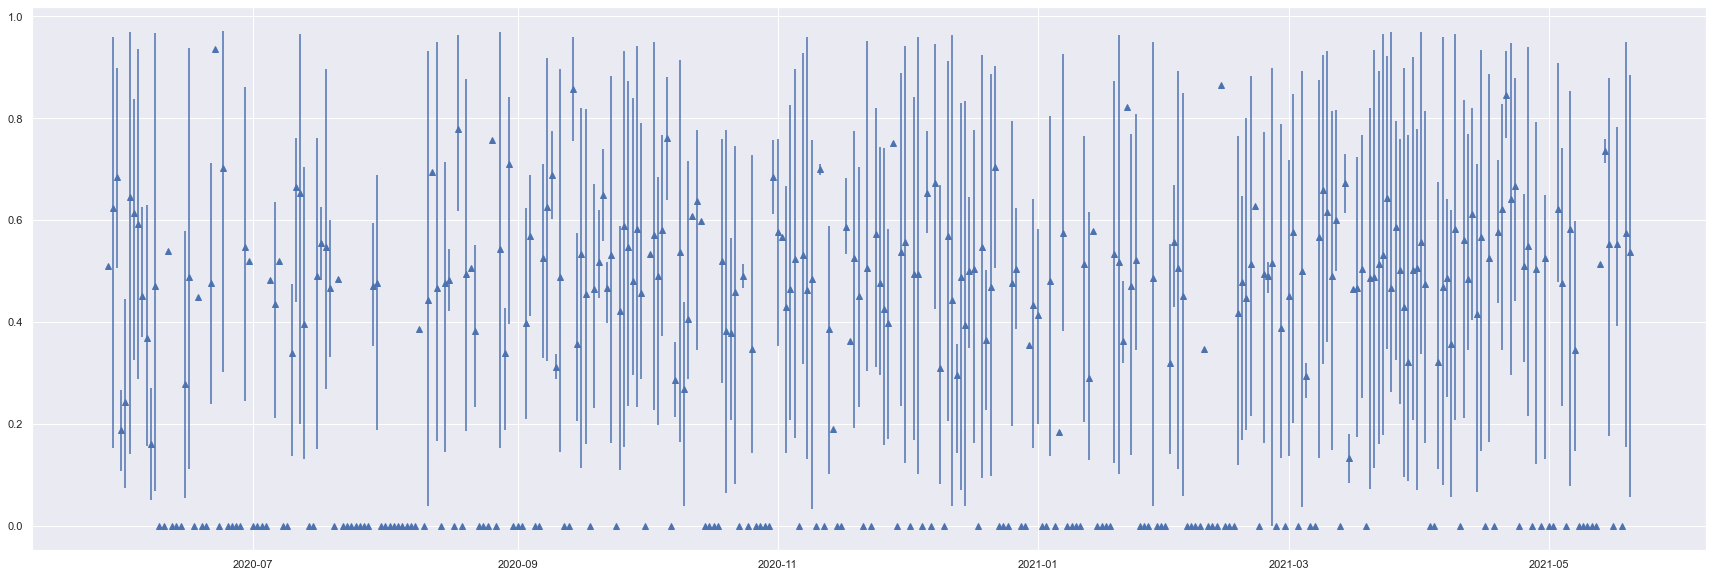

In [21]:
plt.rcParams["figure.figsize"] = (30,10)
plt.errorbar(val["date"],val["mean"], [val["mean"] - val['min'],val['max']-val["mean"]], linestyle='None',marker='^')
plt.show()

As you can see I listened to you all tpes of music be it a happy music or sad music.

Similarly, lets' plot a graph for dance and energy.

In [22]:
energy = my_streaming.groupby('date')['energy'].aggregate(['min', np.mean, 'max'])
dance = my_streaming.groupby('date')['danceability'].aggregate(['min', np.mean, 'max'])

In [23]:
d = pd.merge(idx, energy, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)
e = pd.merge(idx, dance, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)

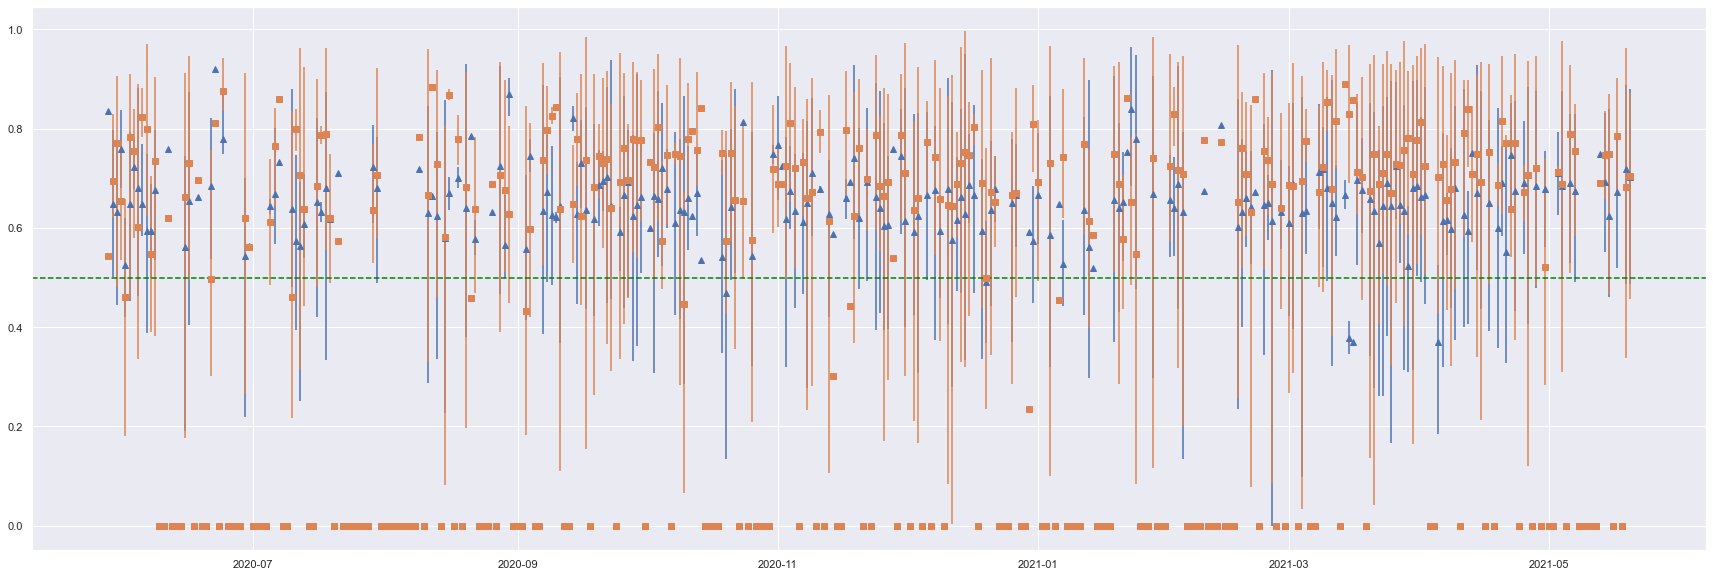

In [24]:
plt.rcParams["figure.figsize"] = (30,10)
plt.errorbar(e["date"],e["mean"], [e["mean"] - e['min'],e['max']-e["mean"]], linestyle='None',marker='^')
plt.errorbar(d["date"],d["mean"], [d["mean"] - d['min'],d['max']-d["mean"]], linestyle='None',marker='s')
plt.axhline(y=0.5, color='green', linestyle='dashed')
plt.show()

# 2. Feature Analysis

In this section, I will analyse the song features.

## Histogram

In [25]:
features = ['danceability', 'energy', 'key', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']

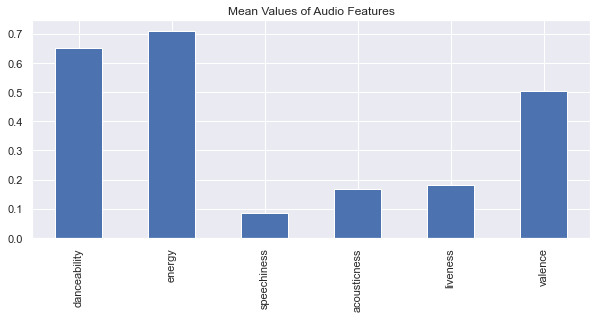

In [26]:
small = my_streaming[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

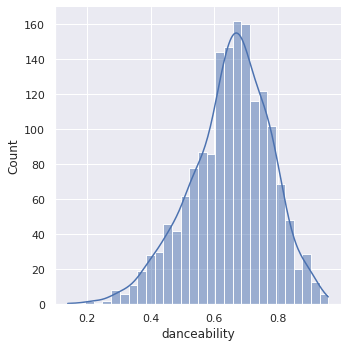

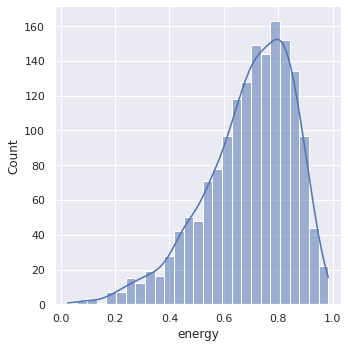

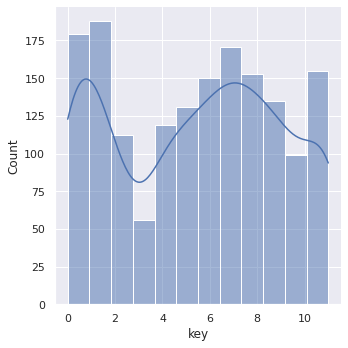

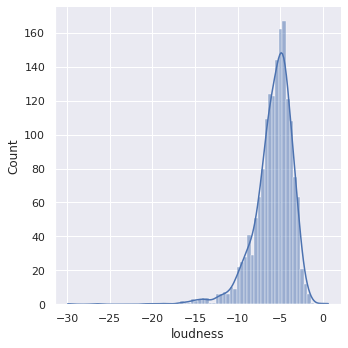

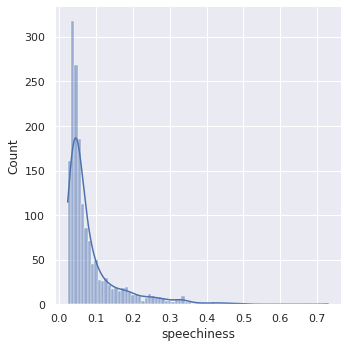

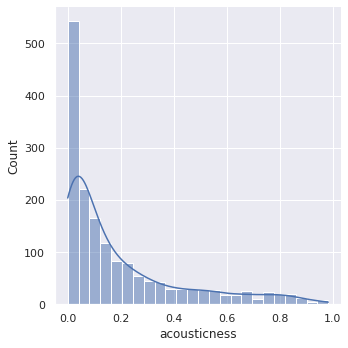

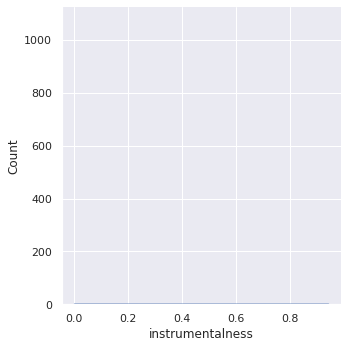

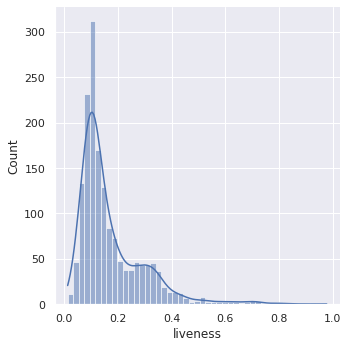

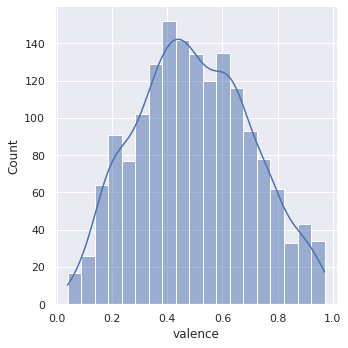

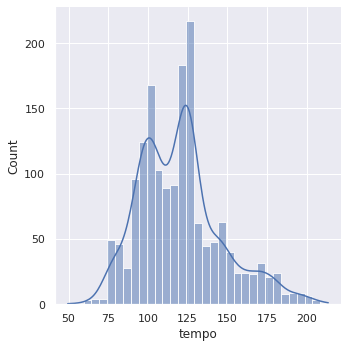

In [ ]:
for col in features:
  sns.displot(my_streaming, x=col, kde=True)
  plt.show()

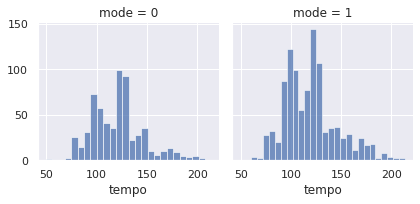

In [ ]:
plt.rcParams['figure.figsize'] = (20,7)
g = sns.FacetGrid(my_streaming, col='mode')
g.map(sns.histplot, "tempo")
plt.show()

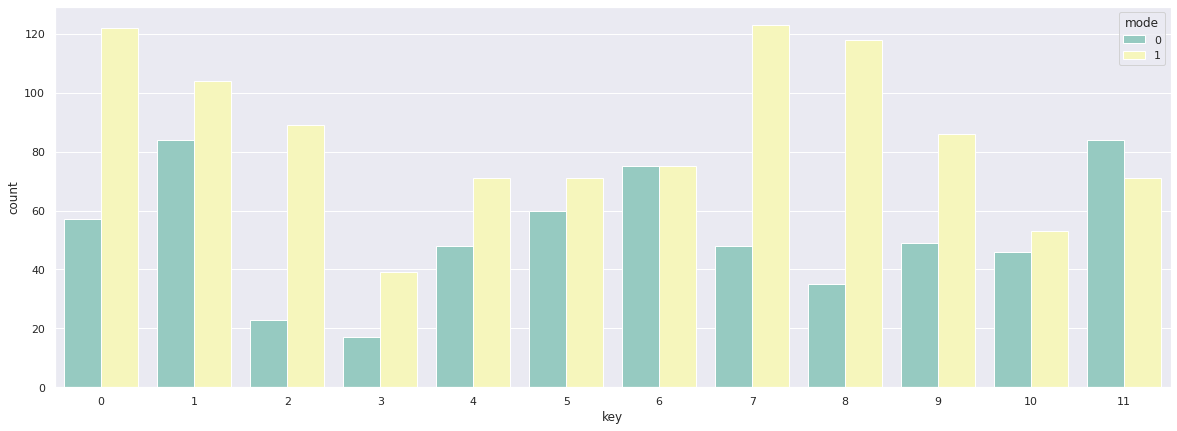

In [ ]:
sns.countplot(data=my_streaming, x='key', hue='mode', palette = 'Set3')

## Heatmap

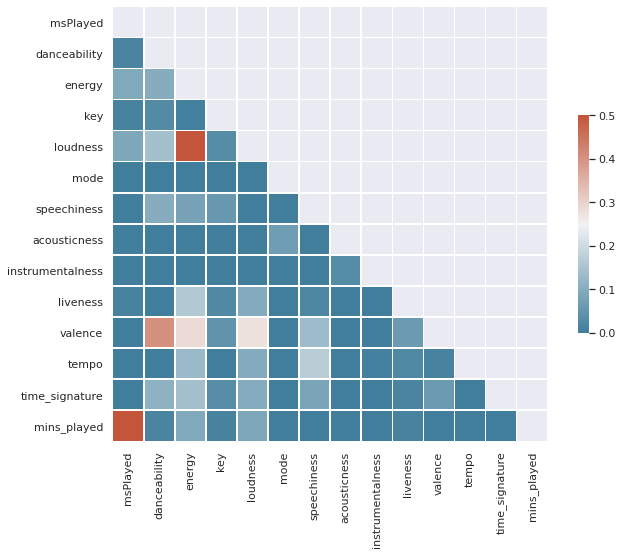

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(my_streaming.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(my_streaming.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the heatmap we can see that there is a huge correlation between:
- loudness X energy
- valence X danceability
- valence X energy
- valence X loudness
- energy X time_signature

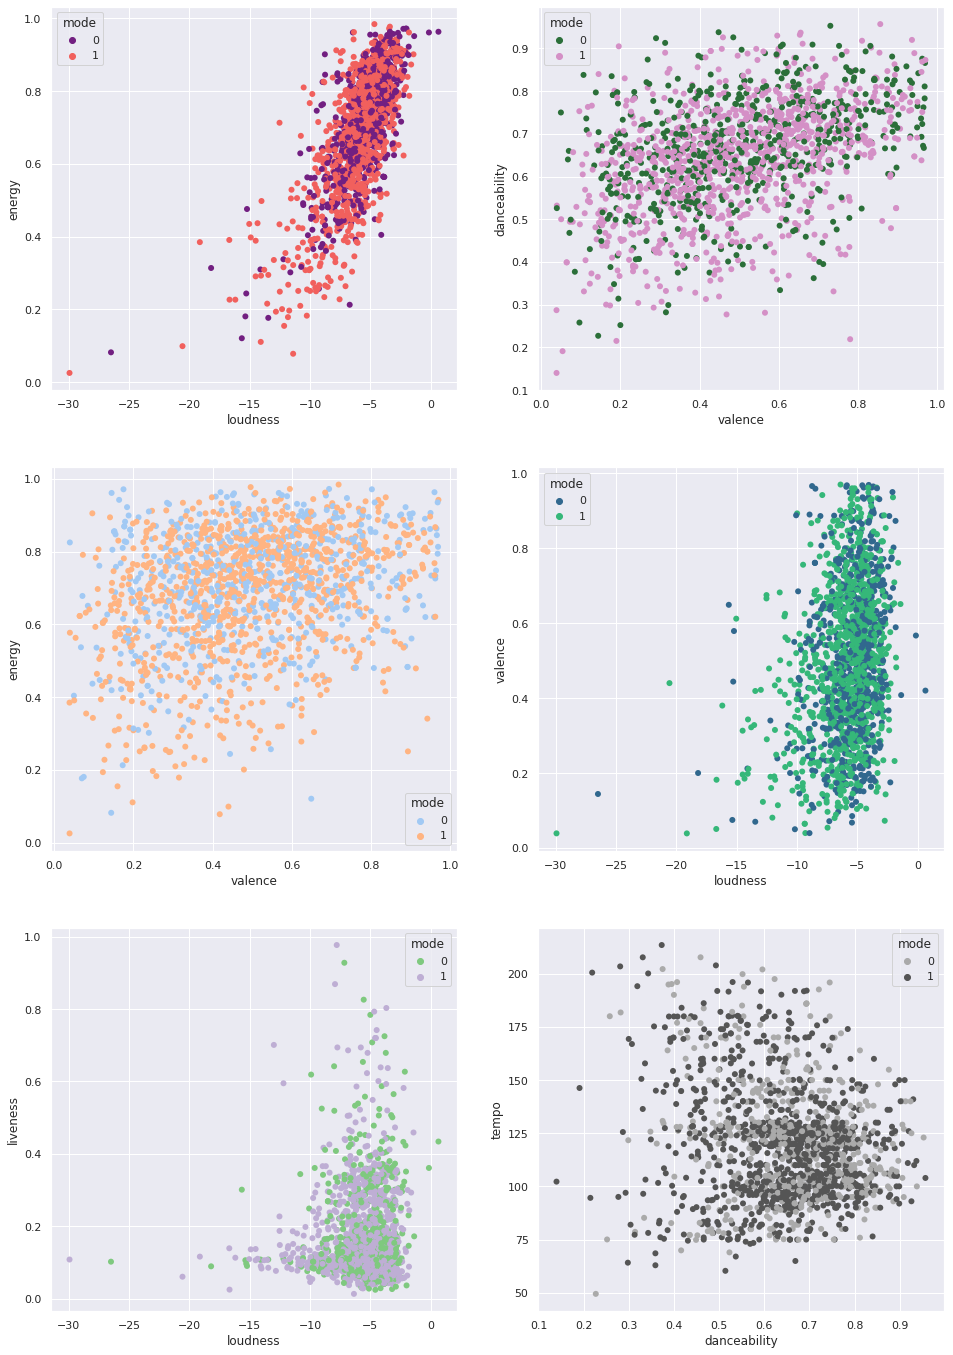

In [ ]:
f, ax = plt.subplots(3,2, figsize=(16,24))

sns.scatterplot(x="loudness", y="energy",
                hue="mode", 
                palette="magma",
                sizes=(1, 8), linewidth=0,
                data=my_streaming, ax=ax[0][0])

sns.scatterplot(x="valence", y="danceability",
                hue="mode", 
                palette="cubehelix",
                sizes=(1, 8), linewidth=0,
                data=my_streaming, ax=ax[0][1])

sns.scatterplot(x="valence", y="energy",
                hue="mode", 
                palette="pastel",
                sizes=(1, 8), linewidth=0,
                data=my_streaming, ax=ax[1][0])

sns.scatterplot(x="loudness", y="valence",
                hue="mode", 
                palette="viridis",
                sizes=(1, 8), linewidth=0,
                data=my_streaming, ax=ax[1][1])

sns.scatterplot(x="loudness", y="liveness",
                hue="mode", 
                palette="Accent",
                sizes=(1, 8), linewidth=0,
                data=my_streaming, ax=ax[2][0])

sns.scatterplot(x="danceability", y="tempo",
                hue="mode", 
                palette="binary",
                sizes=(1, 8), linewidth=0,
                data=my_streaming, ax=ax[2][1])

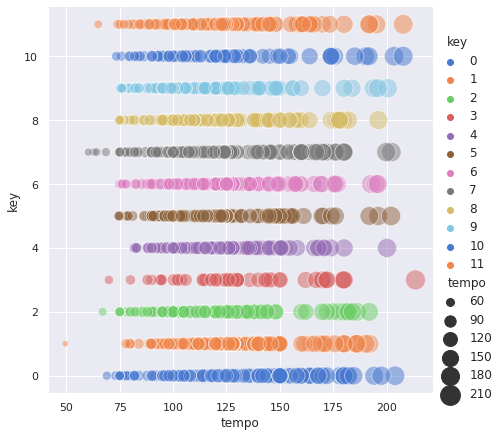

In [ ]:
sns.relplot(x="tempo", y="key", hue="key", size=my_streaming['tempo'],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=my_streaming)

In [ ]:
table = pd.pivot_table(my_streaming,index=['artistName'], values = ['key'], aggfunc=np.mean)
table

key
artistName                   
2015 D&R             5.000000
3LAU                 3.400000
5 Seconds of Summer  5.600000
8-Bit Arcade         2.000000
88rising             6.666667
...                       ...
iKON                 7.000000
teamwork.            6.000000
tofû                 0.000000
traila $ong          1.000000
will.i.am            6.000000

[679 rows x 1 columns]

# 3. My Playlists Analysis

In [ ]:
df = pd.read_csv('/content/playlist_data.csv')
df.head(3)

Unnamed: 0     list_name                 song_id  ... valence mode  key
0           0   Hip-hop/Rap  49NWFeDYeNBx55vxxmwCQe  ...   0.695    1    1
1           1       Country  2bCBowfjQbsT6jXEqpGqDx  ...   0.468    1    7
2           2  Jason derulo  6kex4EBAj0WHXDKZMEJaaF  ...   0.782    1    1

[3 rows x 19 columns]

## Comparing different playlists

In [ ]:
from math import pi

In [ ]:
radar = df.groupby('list_name')[['energy', 'danceability', 'valence', 'liveness', 'acousticness']].aggregate(np.mean)
radar.head(3)

energy  danceability   valence  liveness  acousticness
list_name                                                          
Beats/EDM  0.735316      0.658105  0.525526  0.198763      0.096175
Country    0.763000      0.704000  0.468000  0.138000      0.378000
Cringe     0.705727      0.675364  0.555091  0.122127      0.152400

In [ ]:
playlist_names = radar.index.to_list()
playlist_names

['Beats/EDM',
 'Country',
 'Cringe',
 'Cyrus ne suggest kia',
 'Halsey inducing palsey',
 'Hip-hop/Rap',
 'Jason derulo',
 'Random',
 'Yash ke gaane']

## Different features of the Playlists

In [ ]:
def plot_radar(idx,color):
  # categories
  category = ['energy', 'danceability', 'valence', 'liveness', 'acousticness']
  N = len(category)

  #values
  values = radar.iloc[idx].to_list()
  values += values[:1]

  # calculate angle for each category
  angles = [n / float(N) * 2 * pi for n in range(N) ]
  angles += angles[:1]

  # plot
  plt.polar(angles, values, marker = '.', color=color)
  plt.fill(angles, values, alpha=0.3, color=color)

  # x labels
  plt.xticks(angles[:-1], category)

  # y labels
  plt.yticks([0.2,0.4,0.6,0.8])
  plt.ylim(0,1)

In [ ]:
color = ['crimson', 'teal', 'yellowgreen', 'gold', 'maroon', 'gray', 'lime', 'slateblue', 'chocolate', 'darkcyan']

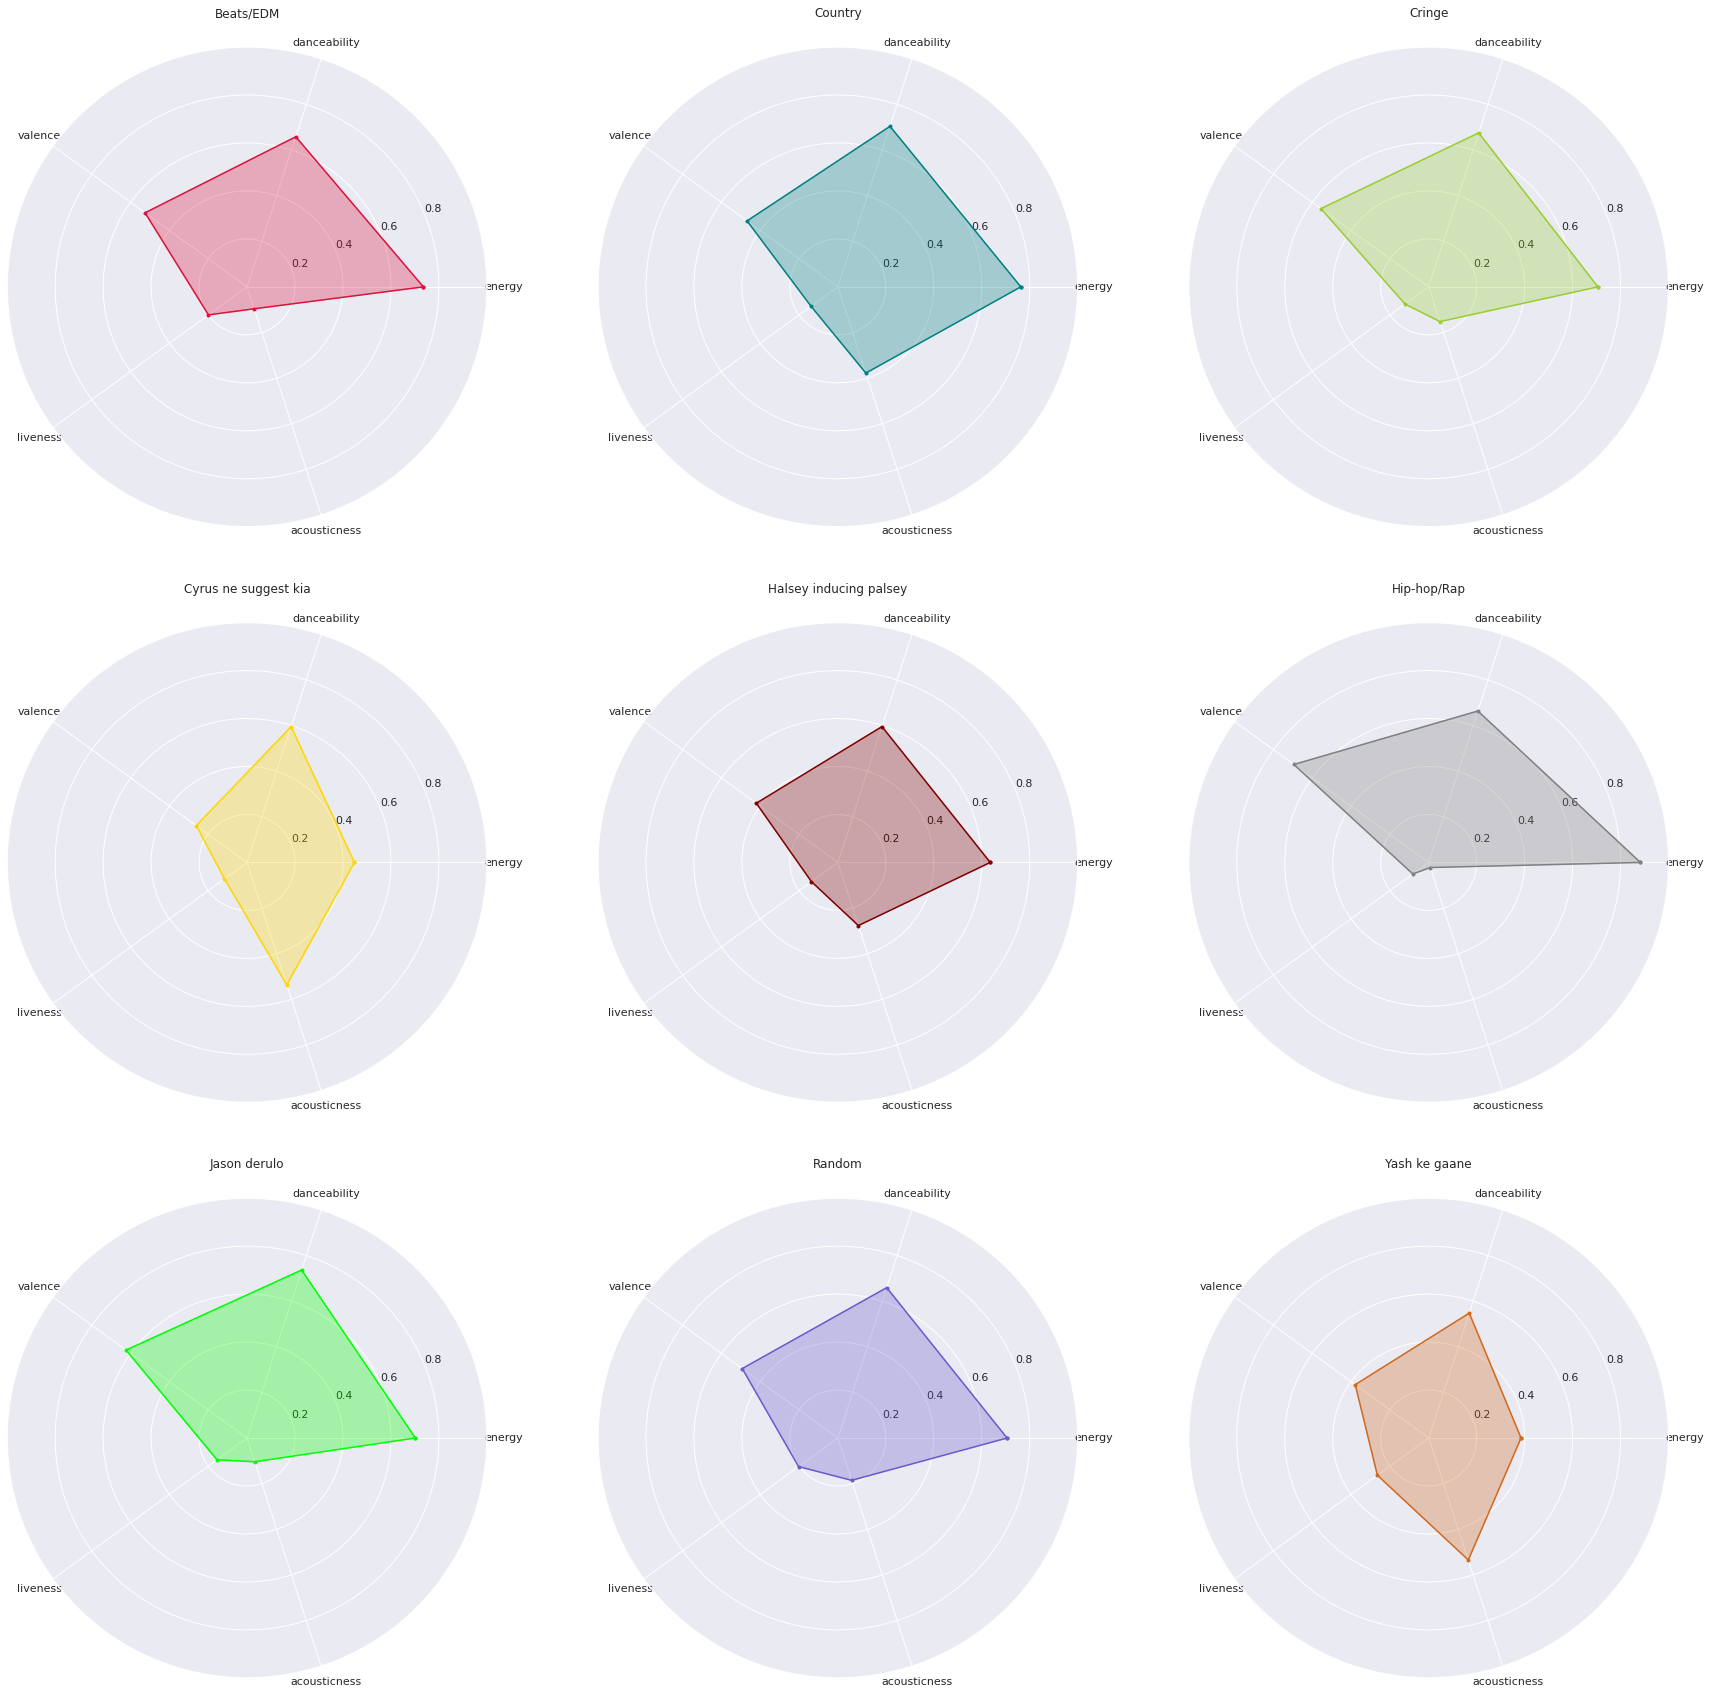

In [ ]:
plt.rcParams['figure.figsize'] = (30,30)
for i in range(9):
  k = i+1
  ax = plt.subplot(int('33' + str(k)), polar='True')
  ax.title.set_text(playlist_names[i])
  plot_radar(i,color[i])

plt.show()

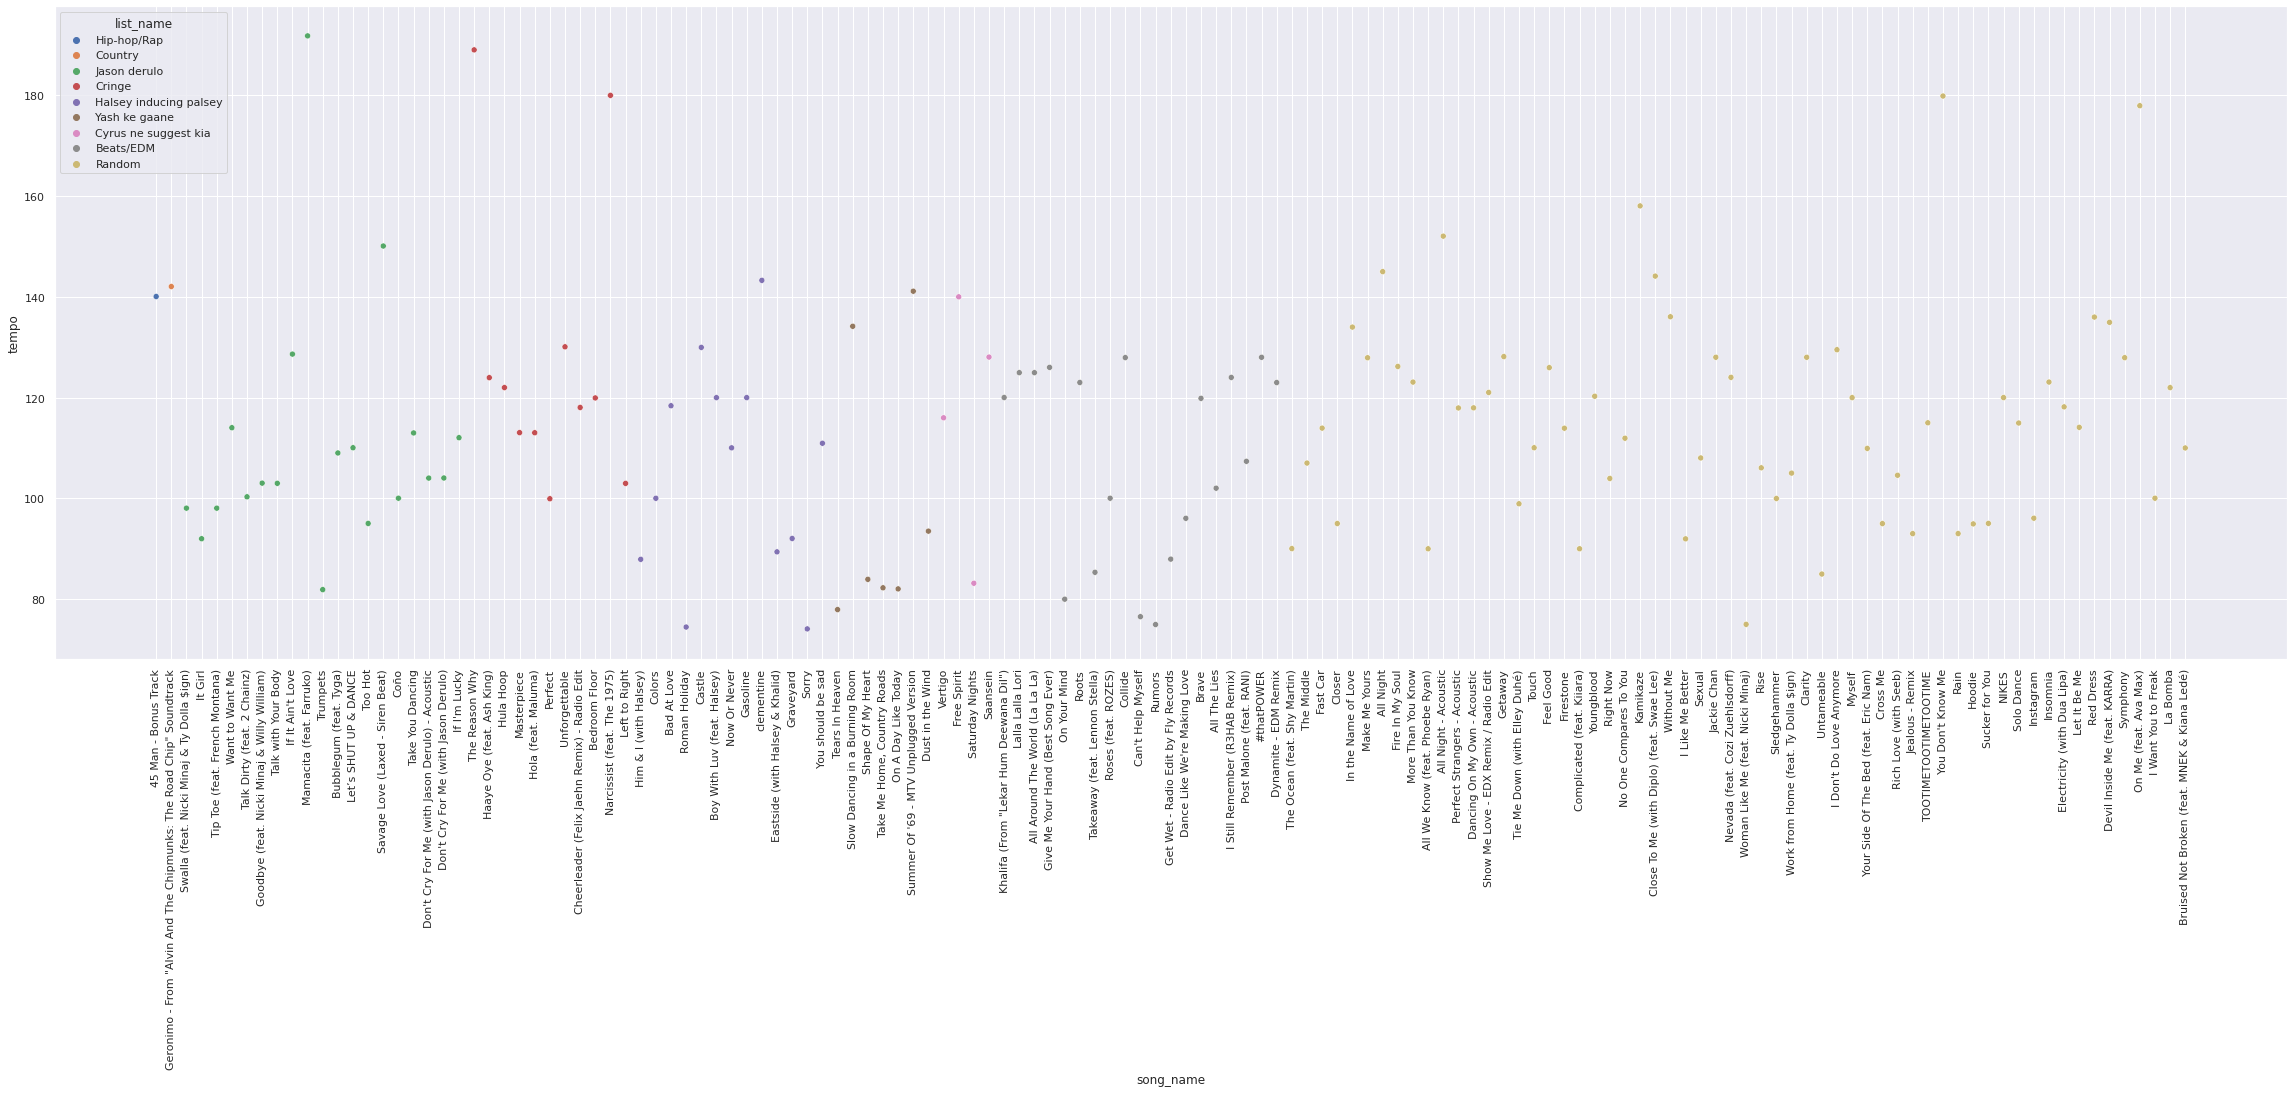

In [ ]:
plt.rcParams['figure.figsize'] = (40,12)
sns.scatterplot(data=df, x='song_name', y='tempo', hue='list_name')
plt.xticks(rotation=90)
plt.show()

## Different songs as per year

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].apply(lambda x: x.year)

In [ ]:
idx = pd.DataFrame(range(1971,2020),columns=['Release Year'])

# then merge the idx with df"release_year" that is just created
release_year = pd.merge(idx, df[['song_id', 'year']], how='left',left_on='Release Year',right_on = 'year', copy=False)

release_year.drop("year",inplace=True,axis=1)
release_year.head(3)

Release Year                 song_id
0          1971  1YYhDizHx7PnDhAhko6cDS
1          1972                     NaN
2          1973                     NaN

In [ ]:
release_year = release_year.groupby('Release Year', as_index=False)['song_id'].count()
release_year.head(3)

Release Year  song_id
0          1971        1
1          1972        0
2          1973        0

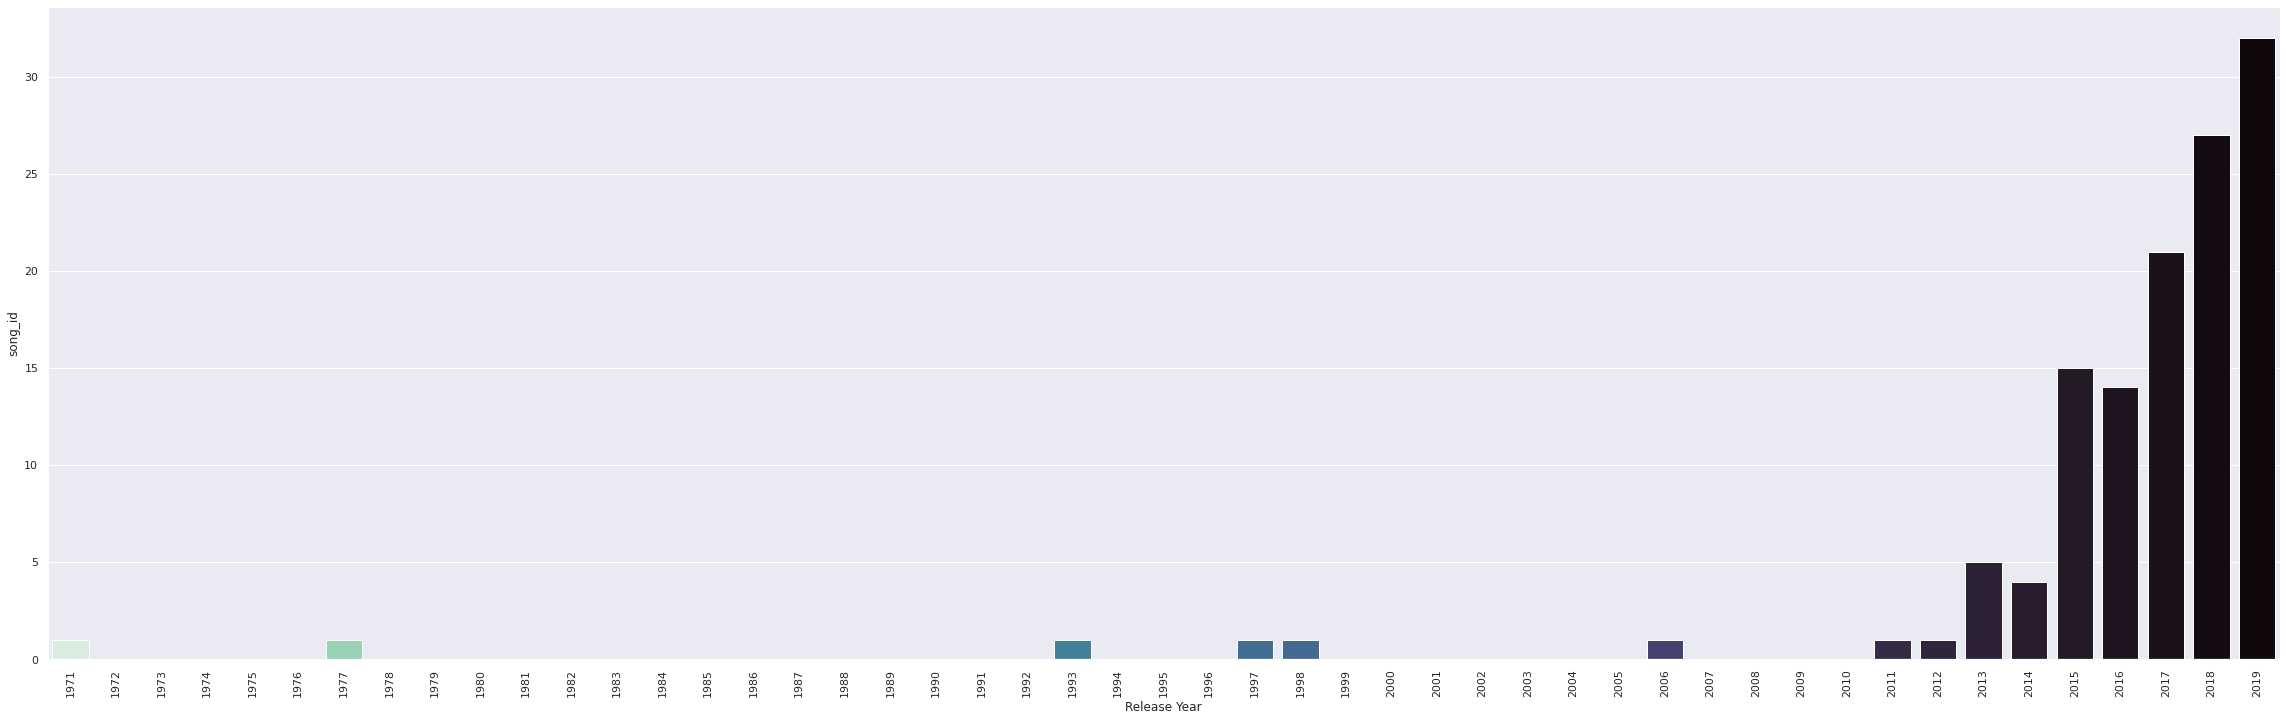

In [ ]:
sns.barplot(data=release_year, x='Release Year', y='song_id', palette='mako_r')
plt.xticks(rotation=90)
plt.show()

Most of the songs I listen to are the recent ones

## Count of songs for each modes

In [ ]:
key_mode = df.groupby(["key","mode"], as_index=False)["song_id"].count()
key_mode.head(3)

key  mode  song_id
0    0     0        3
1    0     1        8
2    1     0        8

In [ ]:
# map the key in number to the real key represented in alphabet
key_dic = {0: "C", 
           1: "C♯/D♭",
           2: "D",
           3: "D♯/E♭",
           4: "E",
           5: "F",
           6: "F♯/G♭",
           7: "G",
           8: "G♯/A♭",
           9: "A",
           10: "A♯/B♭",
           11: "B"}
key_mode = key_mode.replace({"key": key_dic})

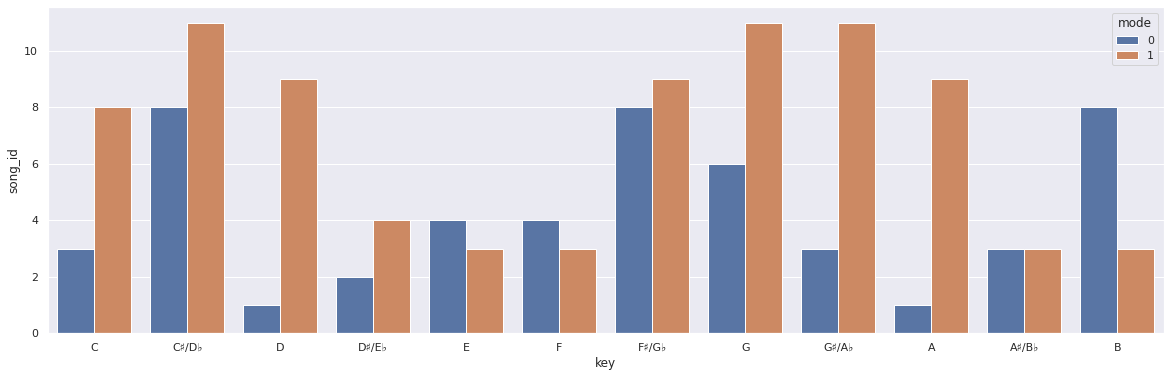

In [ ]:
sns.barplot(data=key_mode, x='key', y='song_id', hue='mode')
plt.show()